<a href="https://colab.research.google.com/github/Vincent-Emma/DS-Unit-2-Regression-Classification/blob/master/V_assignment_regression_classification_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 3

## Assignment

We're going back to our other **New York City** real estate dataset. Instead of predicting apartment rents, you'll predict property sales prices.

But not just for condos in Tribeca...

Instead, predict property sales prices for **One Family Dwellings** (`BUILDING_CLASS_CATEGORY` == `'01 ONE FAMILY DWELLINGS'`) using a subset of the data where the **sale price was more than \\$100 thousand and less than $2 million.** 

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.


- [ ] Do train/test split. Use data from January — March 2019 to train. Use data from April 2019 to test.
- [ ] Do exploratory visualizations with Seaborn.
- [ ] Do one-hot encoding of categorical features.
- [ ] Do feature selection with `SelectKBest`.
- [ ] Fit a linear regression model with multiple features.
- [ ] Get mean absolute error for the test set.
- [ ] As always, commit your notebook to your fork of the GitHub repo.


## Stretch Goals
- [ ] Add your own stretch goal(s) !
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Learn more about feature selection:
    - ["Permutation importance"](https://www.kaggle.com/dansbecker/permutation-importance)
    - [scikit-learn's User Guide for Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
    - [mlxtend](http://rasbt.github.io/mlxtend/) library
    - scikit-learn-contrib libraries: [boruta_py](https://github.com/scikit-learn-contrib/boruta_py) & [stability-selection](https://github.com/scikit-learn-contrib/stability-selection)
    - [_Feature Engineering and Selection_](http://www.feat.engineering/) by Kuhn & Johnson.
- [ ] Try [statsmodels](https://www.statsmodels.org/stable/index.html) if you’re interested in more inferential statistical approach to linear regression and feature selection, looking at p values and 95% confidence intervals for the coefficients.
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).
(That book is good regardless of whether your cultural worldview is inferential statistics or predictive machine learning)
- [ ] Read Leo Breiman's paper, ["Statistical Modeling: The Two Cultures"](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html):

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module3')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd
import pandas_profiling

# Read New York City property sales data
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')

# Change column names: replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# SALE_PRICE was read as strings.
# Remove symbols, convert to integer
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

In [4]:

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,NaN,R4,"447 WEST 18TH STREET, PH12A",PH12A,10011.0,1.0,0.0,1.0,"10,733",1979.0,2007.0,2,R4,0,01/01/2019
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,NaN,O5,144 WEST 37TH STREET,NaN,10018.0,0.0,6.0,6.0,"2,962",15435.0,1920.0,4,O5,0,01/01/2019
2,1,FASHION,21 OFFICE BUILDINGS,4,839,69,NaN,O5,40 WEST 38TH STREET,NaN,10018.0,0.0,7.0,7.0,"2,074",11332.0,1930.0,4,O5,0,01/01/2019
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,592,1041,NaN,R4,"1 SHERIDAN SQUARE, 8C",8C,10014.0,1.0,0.0,1.0,0,500.0,0.0,2,R4,0,01/01/2019
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1379,1402,NaN,R1,"20 EAST 65TH STREET, B",B,10065.0,1.0,0.0,1.0,0,6406.0,0.0,2,R1,0,01/01/2019


In [5]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [0]:
df = df.drop(columns='EASE-MENT')

In [0]:
pd.options.display.float_format = '{:,}'.format

In [0]:
mask = (df['SALE_PRICE'] > 100000) & (df['SALE_PRICE'] < 2000000)

df = df[mask]

In [9]:
df['SALE_PRICE'].describe()

count              13,411.0
mean      716,620.079337857
std     406,826.56912685954
min               100,044.0
25%               415,000.0
50%               633,309.0
75%               915,000.0
max             1,999,877.0
Name: SALE_PRICE, dtype: float64

In [10]:
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format=True)
df['SALE_DATE'].describe()

count                   13411
unique                    103
top       2019-01-31 00:00:00
freq                      285
first     2019-01-01 00:00:00
last      2019-04-30 00:00:00
Name: SALE_DATE, dtype: object

In [11]:
df['SALE_DATE'].dt.month.value_counts()

1    3701
3    3567
2    3174
4    2969
Name: SALE_DATE, dtype: int64

In [12]:

cutoff = pd.to_datetime('2019-04-01')
train = df[df['SALE_DATE'] < cutoff]
test = df[df['SALE_DATE'] >= cutoff]

train.shape, test.shape

((10442, 20), (2969, 20))

In [13]:
for col in sorted(train.columns):
  print(col, train[col].nunique())

ADDRESS 10397
APARTMENT_NUMBER 826
BLOCK 5211
BOROUGH 5
BUILDING_CLASS_AT_PRESENT 96
BUILDING_CLASS_AT_TIME_OF_SALE 96
BUILDING_CLASS_CATEGORY 40
COMMERCIAL_UNITS 16
GROSS_SQUARE_FEET 2242
LAND_SQUARE_FEET 1993
LOT 1021
NEIGHBORHOOD 245
RESIDENTIAL_UNITS 30
SALE_DATE 80
SALE_PRICE 2348
TAX_CLASS_AT_PRESENT 10
TAX_CLASS_AT_TIME_OF_SALE 3
TOTAL_UNITS 35
YEAR_BUILT 128
ZIP_CODE 182


In [14]:
#for categorical estimates

for col in sorted(train.columns):
  if train[col].nunique() < 17:
    print(col)

BOROUGH
COMMERCIAL_UNITS
TAX_CLASS_AT_PRESENT
TAX_CLASS_AT_TIME_OF_SALE


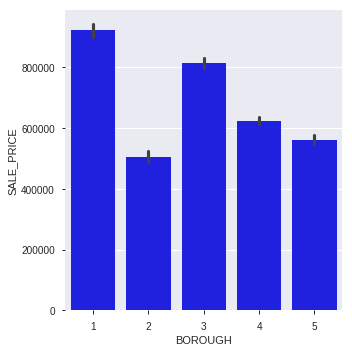

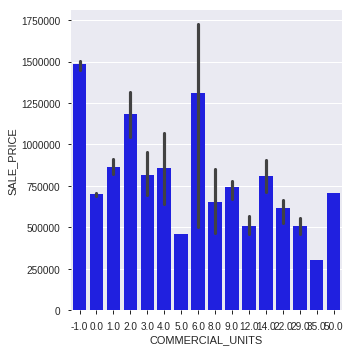

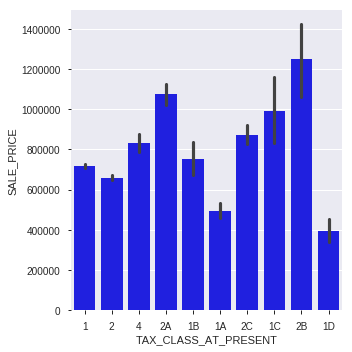

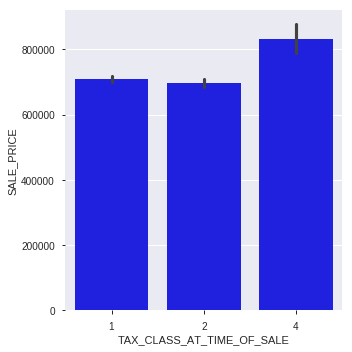

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in sorted(train.columns):
  if train[col].nunique() < 17:
    sns.catplot(x=col, y='SALE_PRICE', data=train, kind='bar', color='blue')
    plt.show();

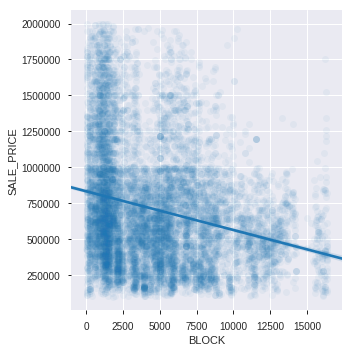

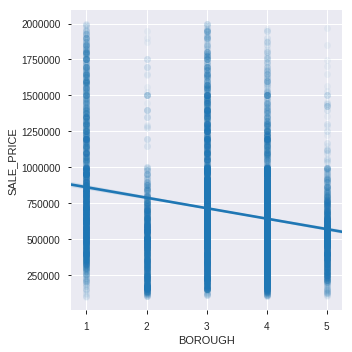

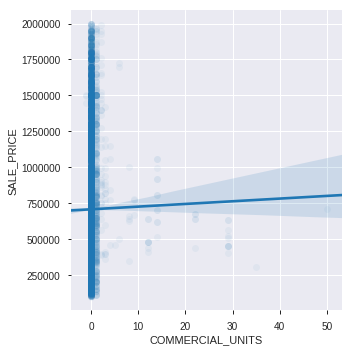

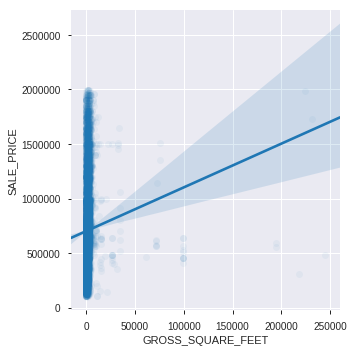

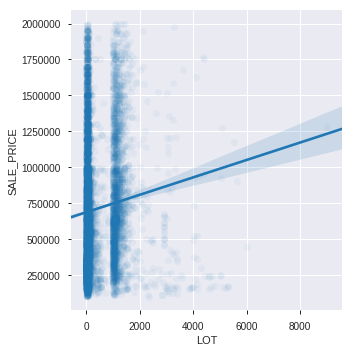

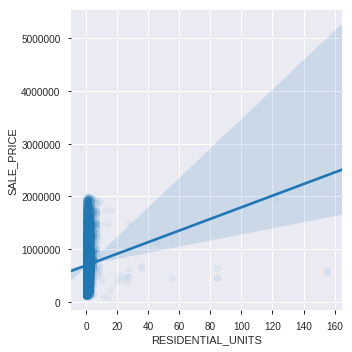

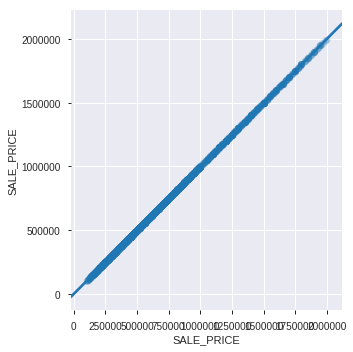

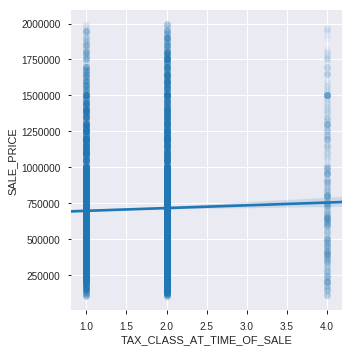

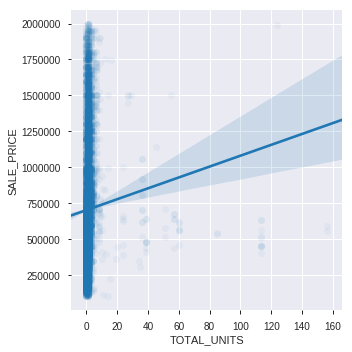

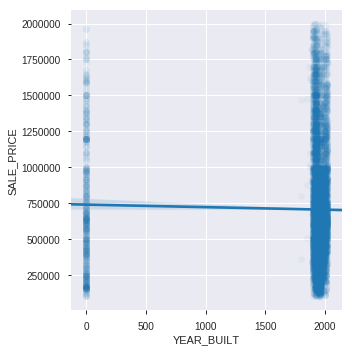

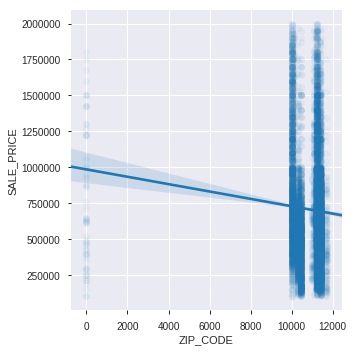

In [16]:
numeric = train.select_dtypes('number')

for col in sorted(numeric.columns):
  sns.lmplot(x=col, y='SALE_PRICE', data=train, scatter_kws=dict(alpha=0.05))
  plt.show()

In [0]:

import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression, SelectKBest

In [18]:
encoder = ce.OneHotEncoder(use_cat_names=True)
cat_features = ['TOTAL_UNITS', 'BOROUGH', 'ZIP_CODE', 'NEIGHBORHOOD', 'BUILDING_CLASS_AT_TIME_OF_SALE']
numeric_features = ['GROSS_SQUARE_FEET', 'LAND_SQUARE_FEET', 'SALE_PRICE']
combined_features = cat_features + numeric_features
train_encoded = encoder.fit_transform(train[combined_features])
test_encoded = encoder.transform(test[combined_features])
train_encoded.head()

,TOTAL_UNITS,BOROUGH,ZIP_CODE,NEIGHBORHOOD_OCEAN PARKWAY-NORTH,NEIGHBORHOOD_QUEENS VILLAGE,NEIGHBORHOOD_MIDTOWN EAST,NEIGHBORHOOD_UPPER EAST SIDE (79-96),NEIGHBORHOOD_UPPER WEST SIDE (59-79),NEIGHBORHOOD_UPPER WEST SIDE (79-96),NEIGHBORHOOD_CASTLE HILL/UNIONPORT,NEIGHBORHOOD_KINGSBRIDGE HTS/UNIV HTS,NEIGHBORHOOD_PELHAM PARKWAY SOUTH,NEIGHBORHOOD_SOUNDVIEW,NEIGHBORHOOD_THROGS NECK,NEIGHBORHOOD_BAY RIDGE,NEIGHBORHOOD_BEDFORD STUYVESANT,NEIGHBORHOOD_BERGEN BEACH,NEIGHBORHOOD_BUSHWICK,NEIGHBORHOOD_CROWN HEIGHTS,NEIGHBORHOOD_EAST NEW YORK,NEIGHBORHOOD_FLATBUSH-CENTRAL,NEIGHBORHOOD_FLATBUSH-EAST,NEIGHBORHOOD_FLATBUSH-LEFFERTS GARDEN,NEIGHBORHOOD_FLATBUSH-NORTH,NEIGHBORHOOD_GRAVESEND,NEIGHBORHOOD_MADISON,NEIGHBORHOOD_MIDWOOD,NEIGHBORHOOD_OLD MILL BASIN,NEIGHBORHOOD_SUNSET PARK,NEIGHBORHOOD_ASTORIA,NEIGHBORHOOD_BAYSIDE,NEIGHBORHOOD_BRIARWOOD,NEIGHBORHOOD_ELMHURST,NEIGHBORHOOD_FLUSHING-NORTH,NEIGHBORHOOD_GLEN OAKS,NEIGHBORHOOD_HOLLIS,NEIGHBORHOOD_HOWARD BEACH,NEIGHBORHOOD_JACKSON HEIGHTS,NEIGHBORHOOD_KEW GARDENS,NEIGHBORHOOD_LAURELTON,...,"LAND_SQUARE_FEET_2,233","LAND_SQUARE_FEET_2,260","LAND_SQUARE_FEET_5,808","LAND_SQUARE_FEET_191,840","LAND_SQUARE_FEET_2,539","LAND_SQUARE_FEET_1,235","LAND_SQUARE_FEET_1,060",LAND_SQUARE_FEET_946,"LAND_SQUARE_FEET_1,698","LAND_SQUARE_FEET_4,140","LAND_SQUARE_FEET_3,012","LAND_SQUARE_FEET_4,305","LAND_SQUARE_FEET_4,485","LAND_SQUARE_FEET_5,384","LAND_SQUARE_FEET_21,335","LAND_SQUARE_FEET_3,647","LAND_SQUARE_FEET_24,825","LAND_SQUARE_FEET_5,150","LAND_SQUARE_FEET_2,557","LAND_SQUARE_FEET_4,281","LAND_SQUARE_FEET_1,506","LAND_SQUARE_FEET_4,632","LAND_SQUARE_FEET_3,465","LAND_SQUARE_FEET_1,380","LAND_SQUARE_FEET_11,204","LAND_SQUARE_FEET_1,385","LAND_SQUARE_FEET_2,368","LAND_SQUARE_FEET_3,338","LAND_SQUARE_FEET_5,602","LAND_SQUARE_FEET_2,692","LAND_SQUARE_FEET_3,692","LAND_SQUARE_FEET_1,793","LAND_SQUARE_FEET_2,755","LAND_SQUARE_FEET_5,260","LAND_SQUARE_FEET_3,170","LAND_SQUARE_FEET_3,268","LAND_SQUARE_FEET_3,230","LAND_SQUARE_FEET_5,876","LAND_SQUARE_FEET_4,361",SALE_PRICE
44,1.0,3,"11,230.0",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,550000
61,1.0,4,"11,427.0",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200000
66,0.0,1,"10,022.0",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,330000
67,0.0,1,"10,075.0",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,600000
71,1.0,1,"10,069.0",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1250000


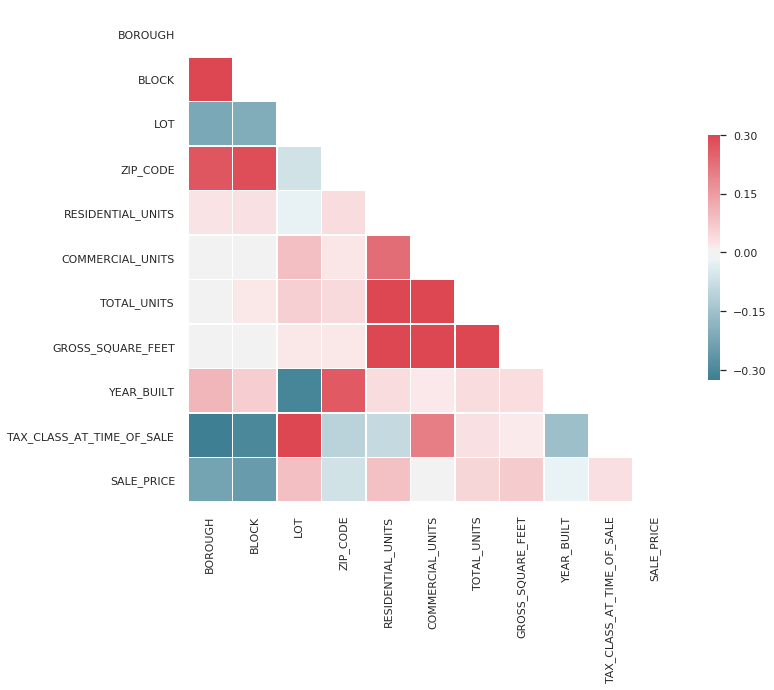

In [19]:
def heatm(data):
  from string import ascii_letters


  sns.set(style="white")
  corr = data.corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  f, ax = plt.subplots(figsize=(11, 9))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  
  plt.show()
  plt.close()

heatm(train)